## Lead Scoring Case Study
X Education, an education company that sells online courses to industry professionals, has appointed us to help them select the most promising leads.
The company requires us to build a model wherein we need to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
The CEO has given a ballpark of the target lead conversion rate to be around 80% (currently at 30% for all leads).
There are some more problems presented by the company which our model should be able to adjust to if the company's requirement changes in the future. The model should be customizable as per these requirements.

### Step 1: Importing Data

In [530]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [531]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [532]:
# Importing all datasets
leads_data = pd.read_csv("Leads Data.csv")

### Step 2: Data Preparation

In [533]:
# Let's see the head of our dataset
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [534]:
# Let's check the dimensions of the dataframe
leads_data.shape

(9240, 37)

In [535]:
# let's look at the statistical aspects of the dataframe
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [536]:
# Let's see the type of each column
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [537]:
# Checking the percentage of missing values
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

Dropping columns with too many null values

In [538]:
leads_data.drop(['Lead Quality','How did you hear about X Education', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1,inplace=True)

In [539]:
leads_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [540]:
leads_data['I agree to pay the amount through cheque'].value_counts()

I agree to pay the amount through cheque
No    9240
Name: count, dtype: int64

 I agree to pay the amount through cheque - This column should definitely be dropped as it has values containing only 'No'. Also dropping other similar columns containing only 'No' or mostly 'No'.





In [541]:
leads_data.drop(['I agree to pay the amount through cheque', 'Magazine', 'Get updates on DM Content', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Receive More Updates About Our Courses'],axis=1,inplace=True)

In [542]:
leads_data['Lead Profile'].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [543]:
# Given majority of the values in 'Lead Profile' column are Select and 29% of values are null, we are dropping
# this column.
leads_data.drop(['Lead Profile'], axis=1, inplace=True)

#Dropping 'City' column also in line with above
leads_data.drop(['City','Specialization'], axis=1, inplace=True)

In [544]:
# Also, deleting the irrelevant columns/ columns with too many unique values
leads_data.drop(['Last Notable Activity', 'Country', 'Tags','Last Activity','Prospect ID', 'Lead Source'],axis=1,inplace=True)

In [545]:
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Update me on Supply Chain Content                 0.00
A free copy of Mastering The Interview            0.00
dtype: float64

In [546]:
leads_data['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [547]:
# Dropping the column as 29% of the values are null as well as rest of the values are primarily "Better Career Prospects"
leads_data.drop('What matters most to you in choosing a course', axis = 1, inplace=True)

In [548]:
leads_data['Lead Origin'].value_counts()

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

In [549]:
leads_data[leads_data["Lead Origin"] == 'Quick Add Form']

,Lead Number,Lead Origin,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,Search,Digital Advertisement,Through Recommendations,Update me on Supply Chain Content,A free copy of Mastering The Interview
2601,634618,Quick Add Form,Yes,No,1,NaN,2217,NaN,Unemployed,No,No,No,No,No


In [550]:
leads_data = leads_data[leads_data["Lead Origin"] != 'Quick Add Form']

In [551]:
leads_data['Converted'].value_counts()

Converted
0    5679
1    3560
Name: count, dtype: int64

In [552]:
leads_data = leads_data[~leads_data['TotalVisits'].isna()]

In [553]:
leads_data = leads_data[~leads_data['Page Views Per Visit'].isna()]

In [554]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9103 non-null   int64  
 1   Lead Origin                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Do Not Call                             9103 non-null   object 
 4   Converted                               9103 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9103 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   What is your current occupation         6420 non-null   object 
 9   Search                                  9103 non-null   object 
 10  Digital Advertisement                   9103 non-null   object 
 

In [555]:
leads_data['Total Page Views'] = leads_data['TotalVisits'] * leads_data['Page Views Per Visit']

In [556]:
#Retaining Total Page views and dropping TotalVisits and Page Views Per Visit columns
leads_data.drop(['TotalVisits', 'Page Views Per Visit'], axis = 1, inplace = True)

In [557]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9103 non-null   int64  
 1   Lead Origin                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Do Not Call                             9103 non-null   object 
 4   Converted                               9103 non-null   int64  
 5   Total Time Spent on Website             9103 non-null   int64  
 6   What is your current occupation         6420 non-null   object 
 7   Search                                  9103 non-null   object 
 8   Digital Advertisement                   9103 non-null   object 
 9   Through Recommendations                 9103 non-null   object 
 10  Update me on Supply Chain Content       9103 non-null   object 
 

#### Converting some binary variables (Yes/No) to 0/1

In [558]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search','Digital Advertisement','Through Recommendations', 'Update me on Supply Chain Content','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the leads list
leads_data[varlist] = leads_data[varlist].apply(binary_map)

#### Converting the categorical variables - Lead Origin & What is your current occupation

In [559]:
leads_data['Lead Origin'].value_counts()

Lead Origin
Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: count, dtype: int64

In [560]:
# Creating a dummy variable for the Leads Origin variable and dropping the first one.
LO_dummy = pd.get_dummies(leads_data['Lead Origin'], drop_first=True, dtype=int)

leads_data = pd.concat([leads_data, LO_dummy], axis=1)

#Dropping original Lead Origin column
leads_data.drop('Lead Origin', axis = 1, inplace = True)

In [561]:
leads_data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5502
Working Professional     679
Student                  207
Other                     15
Housewife                  9
Businessman                8
Name: count, dtype: int64

Filling null values in the current occupation column as 'Unknown'. Dropping this column wouldn't be ideal as it is looks like an important factor in determining conversion of a lead

In [562]:
leads_data['What is your current occupation'] = leads_data['What is your current occupation'].fillna('Unknown')

Merging Student, Housewife and Businessman categories into Other as they are less in number

In [563]:
leads_data['What is your current occupation'] = leads_data['What is your current occupation'].apply(lambda x: x.replace('Student', 'Other'))
leads_data['What is your current occupation'] = leads_data['What is your current occupation'].apply(lambda x: x.replace('Housewife', 'Other'))
leads_data['What is your current occupation'] = leads_data['What is your current occupation'].apply(lambda x: x.replace('Businessman', 'Other'))

In [564]:
leads_data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5502
Unknown                 2683
Working Professional     679
Other                    239
Name: count, dtype: int64

In [565]:
# Creating a dummy variable for the Current Occupation variable and dropping the first one.
CO_dummy = pd.get_dummies(leads_data['What is your current occupation'], drop_first=True, dtype=int)

leads_data = pd.concat([leads_data, CO_dummy], axis=1)

#Dropping original current occupation column

leads_data.drop('What is your current occupation', axis = 1, inplace = True)

leads_data = leads_data.rename({'Unknown': 'Unknown Employment'}, axis=1)

#### Checking for Outliers

In [566]:
# Checking for outliers in the continuous variables
num_leads = leads_data[['Total Time Spent on Website','Total Page Views']]

In [567]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Total Time Spent on Website,Total Page Views
count,9103.000000,9103.000000
mean,481.350104,13.513797
std,545.066142,42.217059
min,0.000000,0.000000
25%,9.000000,1.000000
50%,244.000000,4.500000
75%,919.500000,16.000000
90%,1372.000000,32.000000
95%,1556.900000,49.000000
99%,1838.960000,100.000000


In [568]:
#Capping the values of the Total Page Views till 99.5th percentile
leads_data['Total Page Views'].describe(percentiles = [.99,.995])

count    9103.000000
mean       13.513797
std        42.217059
min         0.000000
50%         4.500000
99%       100.000000
99.5%     138.594000
max      3025.000000
Name: Total Page Views, dtype: float64

In [569]:
leads_data = leads_data[leads_data['Total Page Views']<= 138.594]

In [570]:
leads_data.shape

(9057, 17)

In [571]:
leads_data.head()

,Lead Number,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Digital Advertisement,Through Recommendations,Update me on Supply Chain Content,A free copy of Mastering The Interview,Total Page Views,Landing Page Submission,Lead Add Form,Lead Import,Unemployed,Unknown Employment,Working Professional
0,660737,0,0,0,0,0,0,0,0,0,0.0,0,0,0,1,0,0
1,660728,0,0,0,674,0,0,0,0,0,12.5,0,0,0,1,0,0
2,660727,0,0,1,1532,0,0,0,0,1,4.0,1,0,0,0,0,0
3,660719,0,0,0,305,0,0,0,0,0,1.0,1,0,0,1,0,0
4,660681,0,0,1,1428,0,0,0,0,0,2.0,1,0,0,1,0,0


### Step 3: Test-Train Split

In [572]:
from sklearn.model_selection import train_test_split

In [573]:
# Putting feature vector into X
X = leads_data.drop(['Lead Number','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Digital Advertisement,Through Recommendations,Update me on Supply Chain Content,A free copy of Mastering The Interview,Total Page Views,Landing Page Submission,Lead Add Form,Lead Import,Unemployed,Unknown Employment,Working Professional
0,0,0,0,0,0,0,0,0,0.0,0,0,0,1,0,0
1,0,0,674,0,0,0,0,0,12.5,0,0,0,1,0,0
2,0,0,1532,0,0,0,0,1,4.0,1,0,0,0,0,0
3,0,0,305,0,0,0,0,0,1.0,1,0,0,1,0,0
4,0,0,1428,0,0,0,0,0,2.0,1,0,0,1,0,0


In [574]:
# Putting response variable to y
y = leads_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

### Step 4: Feature Scaling

In [575]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [576]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [577]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website','Total Page Views']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Total Page Views']])
X_test[['Total Time Spent on Website','Total Page Views']] = scaler.fit_transform(X_test[['Total Time Spent on Website','Total Page Views']])

X_train.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Digital Advertisement,Through Recommendations,Update me on Supply Chain Content,A free copy of Mastering The Interview,Total Page Views,Landing Page Submission,Lead Add Form,Lead Import,Unemployed,Unknown Employment,Working Professional
2257,0,0,-0.252053,0,0,0,0,0,0.243653,1,0,0,1,0,0
3630,0,0,-0.886034,0,0,0,0,0,-0.713046,0,0,0,1,0,0
2205,0,0,-0.246556,0,0,0,0,1,-0.174903,1,0,0,1,0,0
7809,0,0,-0.840226,0,0,0,0,0,-0.473871,0,0,0,1,0,0
1619,0,0,2.001693,0,0,0,0,0,-0.473871,0,0,0,1,0,0


In [578]:
### Checking the conversion Rate
conversion = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
conversion

38.03687755327371

We have a little over 38% conversion rate

### Step 5: Looking at Correlations

In [579]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

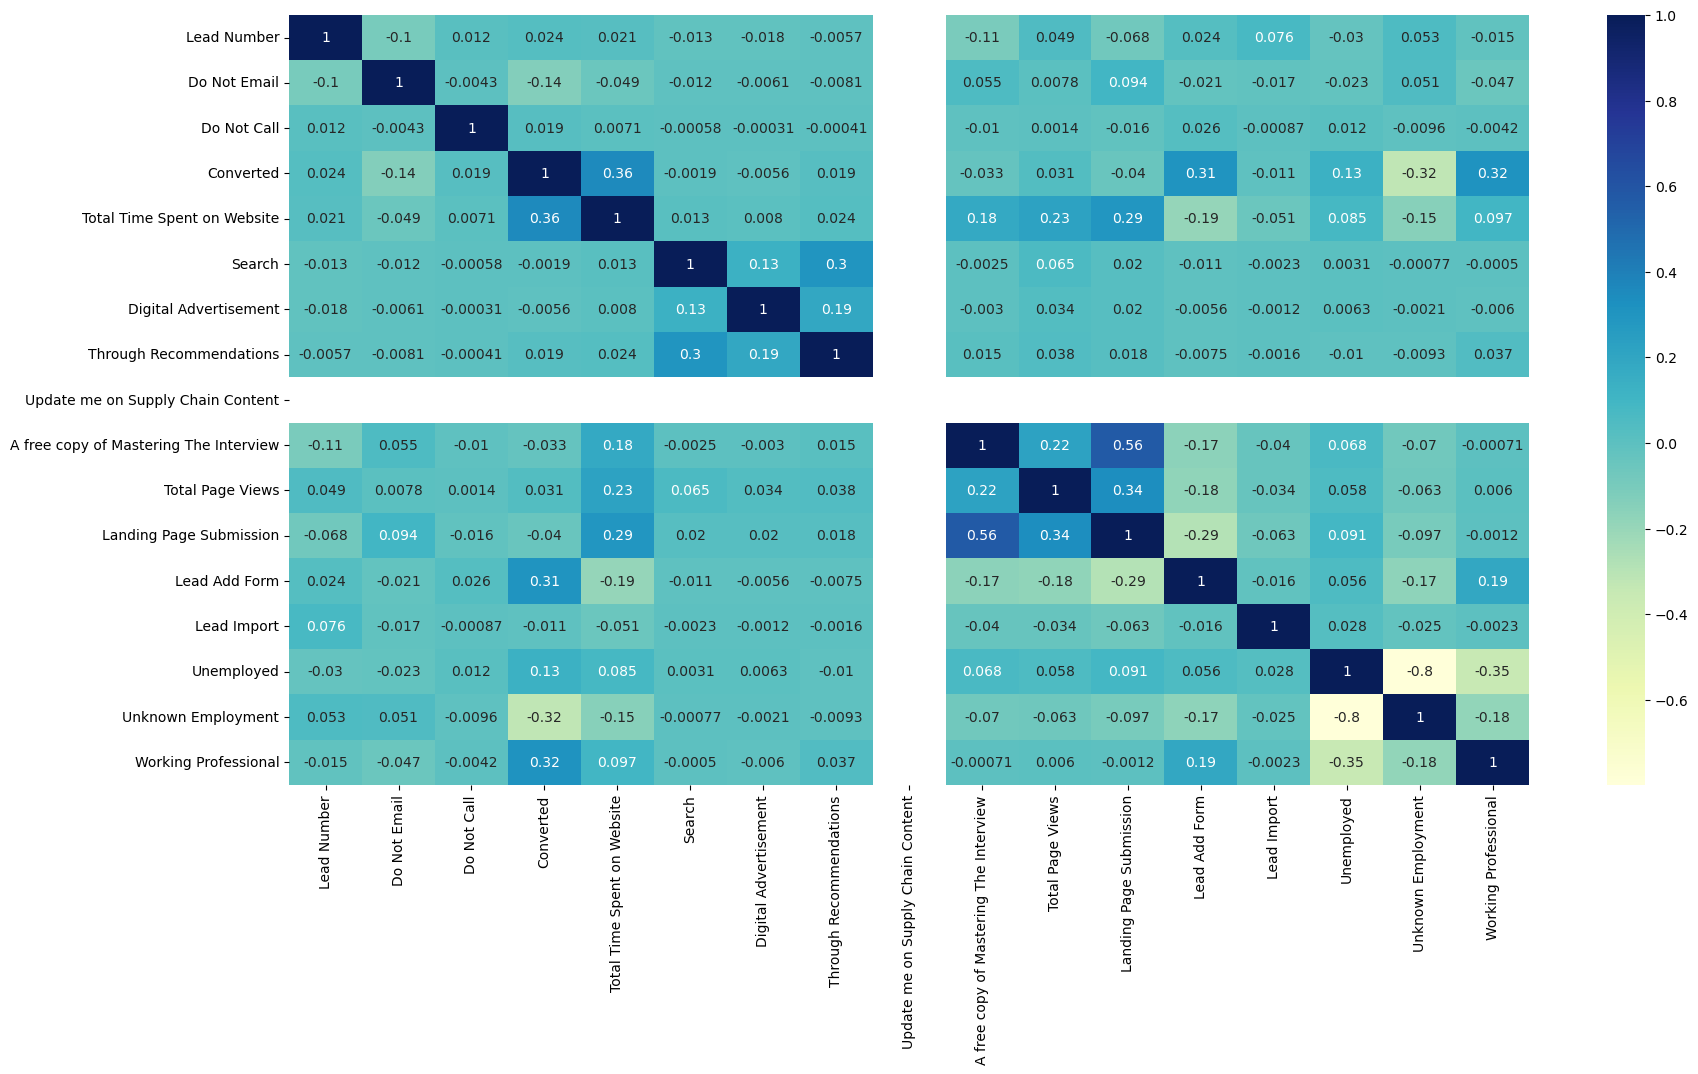

In [580]:
# Let's see the correlation matrix
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leads_data.corr(),annot = True, cmap = 'YlGnBu')
plt.show()

Not dropping any of the above features as correlations are less in value

### Step 6: Model Building

In [581]:
import statsmodels.api as sm

In [582]:
X_train = sm.add_constant(X_train)

In [583]:
# Logistic regression model
logm1 = sm.GLM(y_train, X_train, family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6339
Model:                            GLM   Df Residuals:                     6324
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2880.0
Date:                Sun, 15 Dec 2024   Deviance:                       5760.0
Time:                        13:54:26   Pearson chi2:                 6.41e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3434
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.3698      0.194     -1.910      0.056      -0.749       0.010
Do Not Email                              -1.4220      0.163     -8.741      0.000      -1.741      -1.103
Do Not Call                               18.5922   1.23e+04      0.002      0.999   -2.41e+04    2.41e+04
Total Time Spent on Website                0.9804      0.035     28.140      0.000       0.912       1.049
Search                                    -0.3131      0.824     -0.380      0.704      -1.927       1.301
Digital Advertisement                     -0.5044      1.555     -0.324      0.746      -3.552       2.543
Through Recommendations                    0.7218      1.938      0.372      0.710      -3.077       4.520
Update me on Supply Chain Content       9.221e-11    6.1e-08      0.002      0.999   -1.19e-07     1.2e-07
A free copy of Mastering The Interview    -0.1986      0.083     -2.404      0.016      -0.361      -0.037
Total Page Views                           0.0516      0.034      1.535      0.125      -0.014       0.118
Landing Page Submission                   -0.3111      0.083     -3.729      0.000      -0.475      -0.148
Lead Add Form                              3.8030      0.218     17.413      0.000       3.375       4.231
Lead Import                                0.4928      0.453      1.088      0.277      -0.395       1.380
Unemployed                                 0.0687      0.193      0.356      0.722      -0.310       0.447
Unknown Employment                        -1.1878      0.203     -5.862      0.000      -1.585      -0.791
Working Professional                       2.5281      0.258      9.789      0.000       2.022       3.034
==========================================================================================================
"""

In [584]:
X_train.drop("Update me on Supply Chain Content", inplace=True, axis=1)

In [585]:
X_train = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train, family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6339
Model:                            GLM   Df Residuals:                     6324
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2880.0
Date:                Sun, 15 Dec 2024   Deviance:                       5760.0
Time:                        13:54:26   Pearson chi2:                 6.41e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3434
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.3698      0.194     -1.910      0.056      -0.749       0.010
Do Not Email                              -1.4220      0.163     -8.741      0.000      -1.741      -1.103
Do Not Call                               18.5922   1.23e+04      0.002      0.999   -2.41e+04    2.41e+04
Total Time Spent on Website                0.9804      0.035     28.140      0.000       0.912       1.049
Search                                    -0.3131      0.824     -0.380      0.704      -1.927       1.301
Digital Advertisement                     -0.5044      1.555     -0.324      0.746      -3.552       2.543
Through Recommendations                    0.7218      1.938      0.372      0.710      -3.077       4.520
A free copy of Mastering The Interview    -0.1986      0.083     -2.404      0.016      -0.361      -0.037
Total Page Views                           0.0516      0.034      1.535      0.125      -0.014       0.118
Landing Page Submission                   -0.3111      0.083     -3.729      0.000      -0.475      -0.148
Lead Add Form                              3.8030      0.218     17.413      0.000       3.375       4.231
Lead Import                                0.4928      0.453      1.088      0.277      -0.395       1.380
Unemployed                                 0.0687      0.193      0.356      0.722      -0.310       0.447
Unknown Employment                        -1.1878      0.203     -5.862      0.000      -1.585      -0.791
Working Professional                       2.5281      0.258      9.789      0.000       2.022       3.034
==========================================================================================================
"""

In [586]:
X_train.drop("Do Not Call", inplace=True, axis=1)

In [587]:
X_train = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train, family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6339
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2880.3
Date:                Sun, 15 Dec 2024   Deviance:                       5760.6
Time:                        13:54:31   Pearson chi2:                 6.41e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3434
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.3695      0.194     -1.908      0.056      -0.749       0.010
Do Not Email                              -1.4226      0.163     -8.743      0.000      -1.741      -1.104
Total Time Spent on Website                0.9808      0.035     28.156      0.000       0.913       1.049
Search                                    -0.3137      0.824     -0.381      0.703      -1.928       1.301
Digital Advertisement                     -0.5047      1.555     -0.325      0.746      -3.552       2.543
Through Recommendations                    0.7223      1.938      0.373      0.709      -3.077       4.521
A free copy of Mastering The Interview    -0.1987      0.083     -2.406      0.016      -0.361      -0.037
Total Page Views                           0.0518      0.034      1.540      0.123      -0.014       0.118
Landing Page Submission                   -0.3119      0.083     -3.739      0.000      -0.475      -0.148
Lead Add Form                              3.8059      0.218     17.429      0.000       3.378       4.234
Lead Import                                0.4925      0.453      1.088      0.277      -0.395       1.380
Unemployed                                 0.0692      0.193      0.358      0.720      -0.309       0.448
Unknown Employment                        -1.1877      0.203     -5.861      0.000      -1.585      -0.791
Working Professional                       2.5283      0.258      9.789      0.000       2.022       3.035
==========================================================================================================
"""

### Step 7: Feature Selection Using RFE

In [588]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [589]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=7)             # running RFE with 7 variables as output
rfe = rfe.fit(X_train, y_train)

In [590]:
rfe.support_

array([False,  True,  True, False, False, False, False, False,  True,
        True,  True, False,  True,  True])

In [591]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('const', False, 7),
 ('Do Not Email', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Search', False, 4),
 ('Digital Advertisement', False, 5),
 ('Through Recommendations', False, 3),
 ('A free copy of Mastering The Interview', False, 2),
 ('Total Page Views', False, 6),
 ('Landing Page Submission', True, 1),
 ('Lead Add Form', True, 1),
 ('Lead Import', True, 1),
 ('Unemployed', False, 8),
 ('Unknown Employment', True, 1),
 ('Working Professional', True, 1)]

In [592]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Landing Page Submission', 'Lead Add Form', 'Lead Import',
       'Unknown Employment', 'Working Professional'],
      dtype='object')

#### Checking VIFs

In [593]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [594]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Landing Page Submission,1.33
5,Unknown Employment,1.20
1,Total Time Spent on Website,1.15
6,Working Professional,1.12
3,Lead Add Form,1.11
0,Do Not Email,1.09
4,Lead Import,1.00


Not deleting any of the features as VIF values are very low

##### Assessing the model with StatsModels with remaining columns

In [595]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6339
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2884.4
Date:                Sun, 15 Dec 2024   Deviance:                       5768.7
Time:                        13:54:40   Pearson chi2:                 6.41e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3425
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.3235      0.058     -5.603      0.000      -0.437      -0.210
Do Not Email                   -1.4280      0.162     -8.792      0.000      -1.746      -1.110
Total Time Spent on Website     0.9849      0.035     28.405      0.000       0.917       1.053
Landing Page Submission        -0.3856      0.071     -5.442      0.000      -0.525      -0.247
Lead Add Form                   3.7910      0.218     17.393      0.000       3.364       4.218
Lead Import                     0.4819      0.453      1.065      0.287      -0.405       1.369
Unknown Employment             -1.2546      0.082    -15.293      0.000      -1.415      -1.094
Working Professional            2.4723      0.179     13.779      0.000       2.121       2.824
===============================================================================================
"""

Removing "Lead Import" feature as it has very high P value

In [596]:
col= col.drop("Lead Import")

In [597]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6339
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2884.9
Date:                Sun, 15 Dec 2024   Deviance:                       5769.8
Time:                        13:54:40   Pearson chi2:                 6.41e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3424
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.3170      0.057     -5.524      0.000      -0.429      -0.204
Do Not Email                   -1.4293      0.162     -8.803      0.000      -1.748      -1.111
Total Time Spent on Website     0.9829      0.035     28.398      0.000       0.915       1.051
Landing Page Submission        -0.3908      0.071     -5.530      0.000      -0.529      -0.252
Lead Add Form                   3.7831      0.218     17.367      0.000       3.356       4.210
Unknown Employment             -1.2578      0.082    -15.346      0.000      -1.418      -1.097
Working Professional            2.4713      0.179     13.776      0.000       2.120       2.823
===============================================================================================
"""

##### Creating a dataframe with the actual conversion flag and the predicted probabilities as Lead Score as per requirement

In [598]:
y_train_pred = res.predict(X_train_sm)

In [599]:
y_train_pred_final = pd.DataFrame({'ConversionFlag':y_train.values, 'Lead Score':round(y_train_pred*100)})
y_train_pred_final.head()

,ConversionFlag,Lead Score
2257,0,28.0
3630,0,23.0
2205,0,28.0
7809,0,24.0
1619,1,84.0


##### Creating new column 'predicted' with 1 if Lead Score > 50 else 0

In [600]:
y_train_pred_final['predicted'] = y_train_pred_final['Lead Score'].map(lambda x: 1 if x > 50 else 0)

# Let's see the head
y_train_pred_final.head()

,ConversionFlag,Lead Score,predicted
2257,0,28.0,0
3630,0,23.0,0
2205,0,28.0,0
7809,0,24.0,0
1619,1,84.0,1


In [601]:
from sklearn import metrics

In [602]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.ConversionFlag, y_train_pred_final.predicted )
print(confusion)

[[3504  418]
 [ 847 1570]]


In [603]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.ConversionFlag, y_train_pred_final.predicted))

0.8004417100489036


#### Precision and Recall- We are going with this approach over Sensitivity-Specificity as we need to find the lead conversion rate of 80% which is basically the required precision value

##### Precision
TP / TP + FP

In [604]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.789738430583501

##### Recall
TP / TP + FN

In [605]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6495655771617708

Using sklearn utilities for the same

In [606]:
from sklearn.metrics import precision_score, recall_score

In [607]:
precision_score(y_train_pred_final.ConversionFlag, y_train_pred_final.predicted)

0.789738430583501

In [608]:
recall_score(y_train_pred_final.ConversionFlag, y_train_pred_final.predicted)

0.6495655771617708

### Precision and recall tradeoff

In [609]:
from sklearn.metrics import precision_recall_curve

In [610]:
y_train_pred_final.ConversionFlag, y_train_pred_final.predicted

(2257    0
 3630    0
 2205    0
 7809    0
 1619    1
        ..
 374     1
 84      1
 8213    1
 7090    0
 5759    0
 Name: ConversionFlag, Length: 6339, dtype: int64,
 2257    0
 3630    0
 2205    0
 7809    0
 1619    1
        ..
 374     1
 84      1
 8213    1
 7090    0
 5759    0
 Name: predicted, Length: 6339, dtype: int64)

In [611]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.ConversionFlag, y_train_pred_final["Lead Score"])

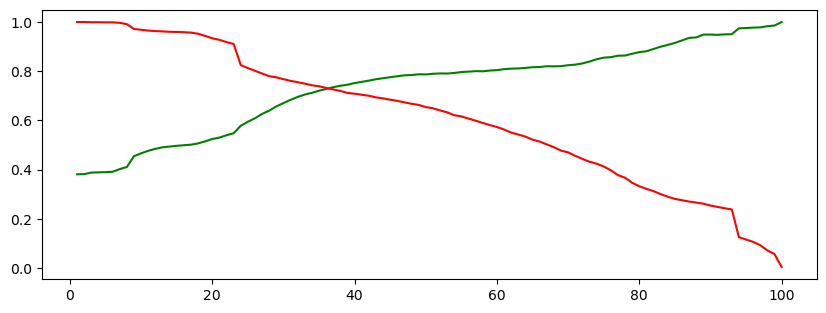

In [658]:
plt.figure(figsize = (10,3.5))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Though 40 is the ideal cut off value for maximizing precision and recall as per above curve, but we need to find cut off value for precision equal to 80 percent. As per the above graph, precision is approx. 80 percent for Lead Score cut off value of 60 and above.

In [640]:
y_train_pred_final['predicted'] = y_train_pred_final['Lead Score'].map(lambda x: 1 if x > 80 else 0)

# Let's see the head
y_train_pred_final.head()

,ConversionFlag,Lead Score,predicted
2257,0,28.0,0
3630,0,23.0,0
2205,0,28.0,0
7809,0,24.0,0
1619,1,84.0,1


In [641]:
precision_score(y_train_pred_final.ConversionFlag, y_train_pred_final.predicted)

0.8812217194570136

As we can see from above, the precision value for train data set is greater than 80% for cut off value of 60

### Step 8: Making predictions on the test set using the final model

In [615]:
X_test.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Digital Advertisement,Through Recommendations,Update me on Supply Chain Content,A free copy of Mastering The Interview,Total Page Views,Landing Page Submission,Lead Add Form,Lead Import,Unemployed,Unknown Employment,Working Professional
2469,0,0,-0.142508,0,0,0,0,0,0.350392,1,0,0,0,1,0
5519,0,0,-0.871834,0,0,0,0,0,-0.695126,0,0,0,0,1,0
6869,0,0,-0.871834,0,0,0,0,0,-0.695126,0,0,0,0,1,0
7824,0,0,-0.529271,0,0,0,0,0,-0.637042,1,0,0,1,0,0
4585,0,0,0.684430,0,0,0,0,1,0.030928,1,0,0,1,0,0


In [616]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Landing Page Submission,Lead Add Form,Unknown Employment,Working Professional
2469,0,-0.142508,1,0,1,0
5519,0,-0.871834,0,0,1,0
6869,0,-0.871834,0,0,1,0
7824,0,-0.529271,1,0,0,0
4585,0,0.684430,1,0,0,0


##### Making predictions on the test set

In [617]:
X_test_sm = sm.add_constant(X_test)

In [618]:
y_test_pred = res.predict(X_test_sm)

In [619]:
# Converting y_test_pred to Dataframe as it is an array
y_test_pred_df = pd.DataFrame(y_test_pred)

In [620]:
y_test_pred_df.head()

,0
2469,0.108549
5519,0.080782
6869,0.080782
7824,0.226537
4585,0.491260


In [621]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test.values)
y_test_df.head()

,0
0,0
1,1
2,0
3,0
4,1


In [622]:
# Removing index for both dataframes to append them side by side 
y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [623]:
# Appending y_test_df and y_test_pred_df
y_test_pred_final = pd.concat([y_test_df, y_test_pred_df],axis=1)
y_test_pred_final.head()

,0,0
0,0,0.108549
1,1,0.080782
2,0,0.080782
3,0,0.226537
4,1,0.491260


In [624]:
y_test_pred_final.columns = [['ConversionFlag', 'Conversion_Prob']]

In [625]:
# Adding Lead Score column
y_test_pred_final["Lead Score"] = round(y_test_pred_final["Conversion_Prob"]*100)

In [626]:
y_test_pred_final.head()

,ConversionFlag,Conversion_Prob,Lead Score
0,0,0.108549,11.0
1,1,0.080782,8.0
2,0,0.080782,8.0
3,0,0.226537,23.0
4,1,0.491260,49.0


In [627]:
y_test_pred_final['final_predicted'] = y_test_pred_final['Lead Score'].map(lambda x: 1 if x > 60 else 0)

# Let's see the head
y_test_pred_final.head()

,ConversionFlag,Conversion_Prob,Lead Score,final_predicted
0,0,0.108549,11.0,0
1,1,0.080782,8.0,0
2,0,0.080782,8.0,0
3,0,0.226537,23.0,0
4,1,0.491260,49.0,0


In [628]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_test_pred_final.ConversionFlag, y_test_pred_final.final_predicted))

0.7855040470934511


In [629]:
precision_score(y_test_pred_final.ConversionFlag, y_test_pred_final.final_predicted)

0.8276877761413843

As we can see from above, the precision value for train data set is greater than 80% for cut off value of 60